In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from prepare_country_data import transpose_for_country_code, split_and_normalize

ImportError: cannot import name 'split_and_normalize' from 'prepare_country_data' (/Users/sorenbendtsen/Documents/GitHub/model_based/prepare_country_data.py)

In [17]:
df = pd.read_csv("data/2023/nordic_energy_data.csv")
df_dk1 = transpose_for_country_code(df, "DK_1")
df_dk1["Timestamp"] = pd.to_datetime(df_dk1["Timestamp"])
df_dk1.set_index("Timestamp", inplace=True)

In [18]:
df_dk1.head()

,DA-price [EUR/MWh],Forecasted Load,Forecasted Generation,Solar,Wind Offshore,Wind Onshore,Cap_to_DK_2,Cap_to_NL,Cap_to_NO_2,Cap_to_SE_3,...,Cap_to_SE_1_NO_4,Cap_to_SE_2_NO_3,Cap_to_SE_2_NO_4,Cap_to_SE_2_SE_1,Cap_to_SE_3_FI,Cap_to_SE_3_NO_1,Cap_to_SE_3_SE_2,Cap_to_SE_3_SE_4,Cap_to_SE_4_DK_2,Cap_to_SE_4_SE_3
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,2.01,2135.0,832.0,0.0,75.0,556.0,590.0,700.0,1632.0,715.0,...,700.0,600.0,250.0,3300.0,0.0,2145.0,6800.0,2800.0,1700.0,4800.0
2023-01-01 01:00:00,1.38,2084.0,974.0,0.0,146.0,639.0,590.0,700.0,1632.0,715.0,...,700.0,600.0,250.0,3300.0,0.0,2145.0,6800.0,2800.0,1700.0,4800.0
2023-01-01 02:00:00,0.09,2059.0,1165.0,0.0,328.0,735.0,590.0,700.0,1632.0,715.0,...,700.0,600.0,250.0,3300.0,0.0,2145.0,6800.0,2800.0,1700.0,4800.0
2023-01-01 03:00:00,0.08,2001.0,1437.0,0.0,376.0,870.0,590.0,700.0,1632.0,715.0,...,700.0,600.0,250.0,3300.0,0.0,2145.0,6800.0,2800.0,1700.0,4800.0
2023-01-01 04:00:00,0.05,1969.0,1517.0,0.0,429.0,1047.0,590.0,700.0,1632.0,715.0,...,700.0,600.0,250.0,3300.0,0.0,2145.0,6800.0,2800.0,1700.0,4800.0


Mean squared error: 493.6821677731233


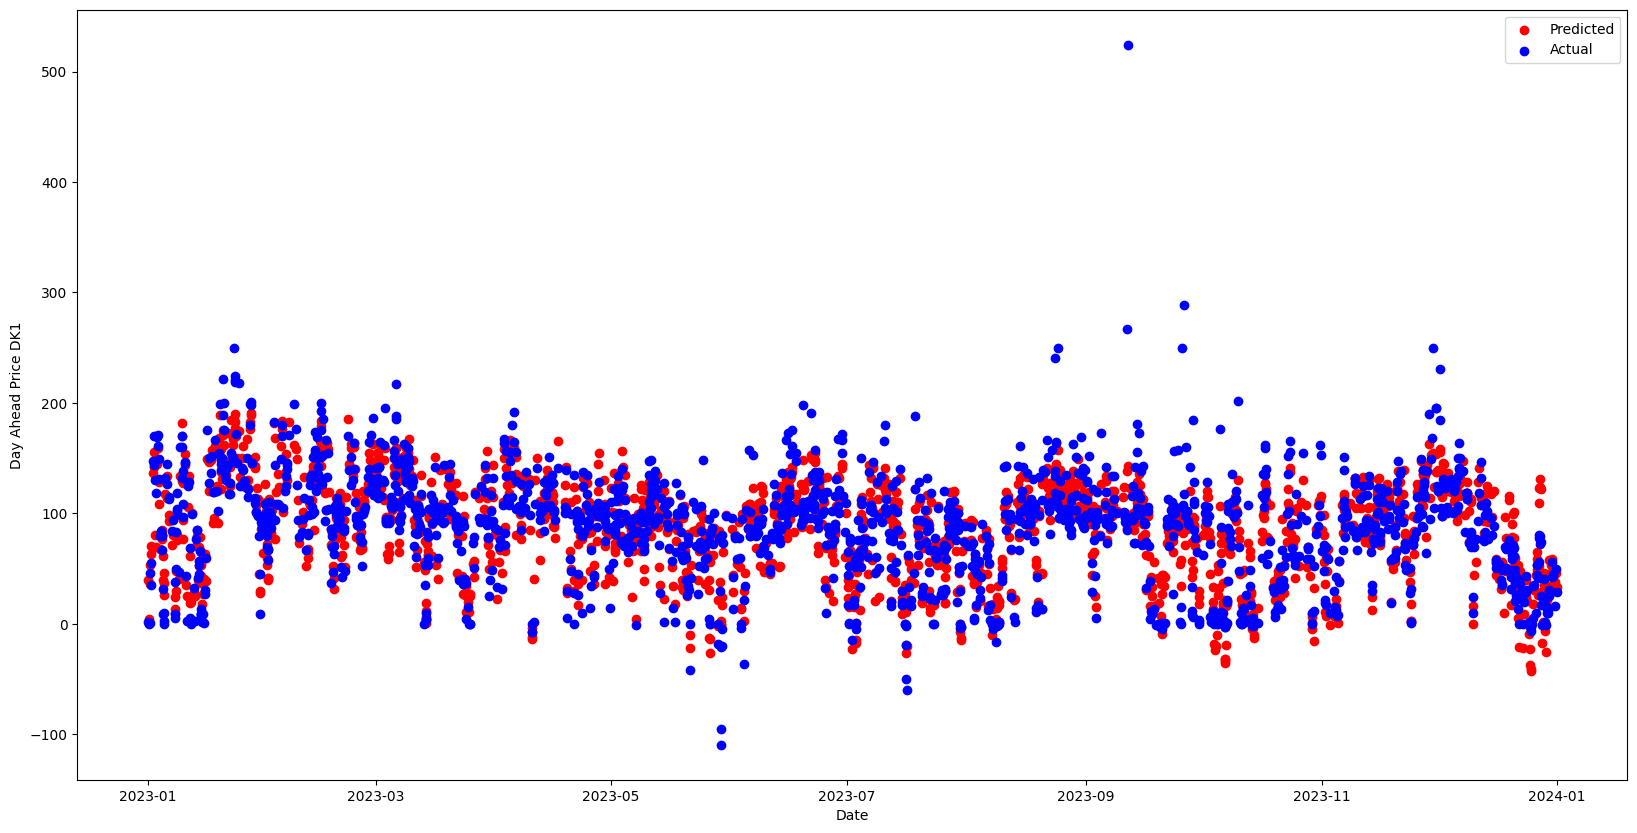

In [28]:
y = df_dk1["DA-price [EUR/MWh]"]
X = df_dk1.drop(columns=["DA-price [EUR/MWh]"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = normalize(X_train)
X_test = normalize(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean squared error: {mse}")

# figsize=(20, 10)
plt.figure(figsize=(20, 10))

plt.scatter(y_test.index, y_pred, label="Predicted", color="red")
plt.scatter(y_test.index, y_test, label="Actual", color="blue")
plt.xlabel("Date")
plt.ylabel("Day Ahead Price DK1")
plt.legend()
plt.show()